In [1]:
import pandas as pd

df = pd.read_csv('country_vaccinations.csv')

In [2]:
df.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [3]:
df = df[df['country']=='Indonesia']

In [4]:
df.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
20677,Indonesia,IDN,2021-01-12,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Ministry of Health,https://vaksin.kemkes.go.id/#/vaccines
20678,Indonesia,IDN,2021-01-13,NaN,NaN,NaN,NaN,13200.0,NaN,NaN,NaN,48.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Ministry of Health,https://vaksin.kemkes.go.id/#/vaccines
20679,Indonesia,IDN,2021-01-14,NaN,NaN,NaN,NaN,13200.0,NaN,NaN,NaN,48.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Ministry of Health,https://vaksin.kemkes.go.id/#/vaccines
20680,Indonesia,IDN,2021-01-15,NaN,NaN,NaN,NaN,13200.0,NaN,NaN,NaN,48.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Ministry of Health,https://vaksin.kemkes.go.id/#/vaccines
20681,Indonesia,IDN,2021-01-16,NaN,NaN,NaN,NaN,13200.0,NaN,NaN,NaN,48.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Ministry of Health,https://vaksin.kemkes.go.id/#/vaccines


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [6]:
df = df.set_index(df.date)

In [7]:
df.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
date,,,,,,,,,,,,,,,
2021-01-12,Indonesia,IDN,2021-01-12,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Ministry of Health,https://vaksin.kemkes.go.id/#/vaccines
2021-01-13,Indonesia,IDN,2021-01-13,NaN,NaN,NaN,NaN,13200.0,NaN,NaN,NaN,48.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Ministry of Health,https://vaksin.kemkes.go.id/#/vaccines
2021-01-14,Indonesia,IDN,2021-01-14,NaN,NaN,NaN,NaN,13200.0,NaN,NaN,NaN,48.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Ministry of Health,https://vaksin.kemkes.go.id/#/vaccines
2021-01-15,Indonesia,IDN,2021-01-15,NaN,NaN,NaN,NaN,13200.0,NaN,NaN,NaN,48.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Ministry of Health,https://vaksin.kemkes.go.id/#/vaccines
2021-01-16,Indonesia,IDN,2021-01-16,NaN,NaN,NaN,NaN,13200.0,NaN,NaN,NaN,48.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Ministry of Health,https://vaksin.kemkes.go.id/#/vaccines


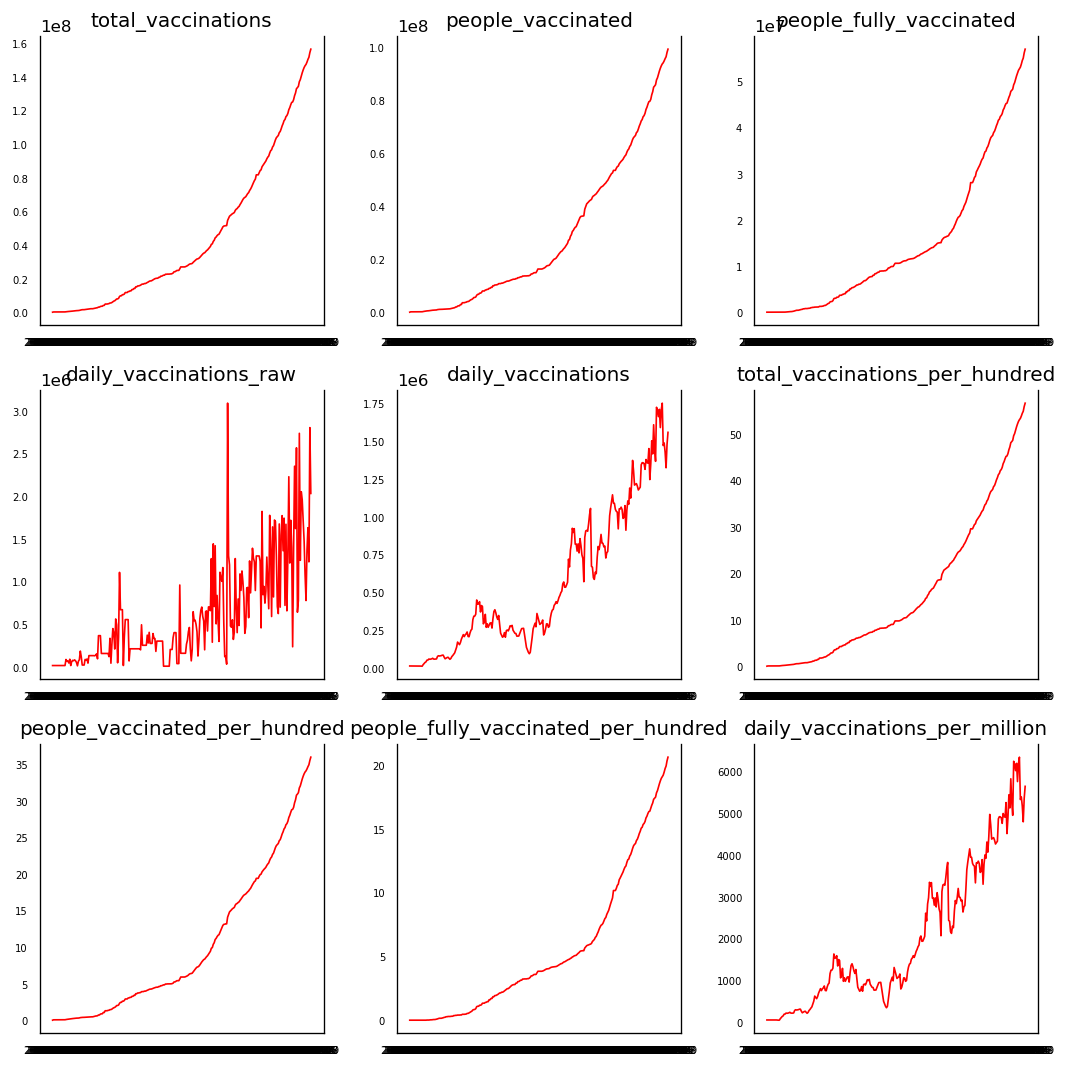

In [8]:
df = df.drop(columns=['country', 'iso_code', 'date', 'vaccines', 'source_name', 'source_website'])
df_plot = df.fillna(method = 'bfill')

fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(9,9))
for i, ax in enumerate(axes.flatten()):
    data = df_plot[df_plot.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df_plot.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [9]:
df_plot.head(5)

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
date,,,,,,,,,
2021-01-12,0.0,0.0,5468.0,12717.0,13200.0,0.00,0.00,0.0,48.0
2021-01-13,132000.0,132000.0,5468.0,12717.0,13200.0,0.05,0.05,0.0,48.0
2021-01-14,132000.0,132000.0,5468.0,12717.0,13200.0,0.05,0.05,0.0,48.0
2021-01-15,132000.0,132000.0,5468.0,12717.0,13200.0,0.05,0.05,0.0,48.0
2021-01-16,132000.0,132000.0,5468.0,12717.0,13200.0,0.05,0.05,0.0,48.0


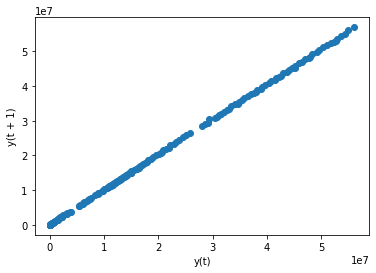

In [10]:
from pandas.plotting import lag_plot
series = df[['people_fully_vaccinated']]
lag_plot(series)
plt.show()

In [11]:
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.999953
t+1  0.999953  1.000000


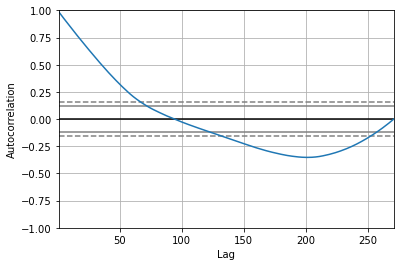

In [12]:
series = series.fillna(method = 'bfill')

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()

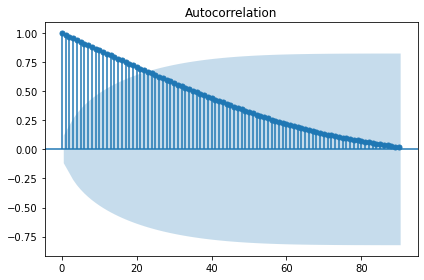

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=90)
plt.tight_layout()

P-value:  0.9971442614263477


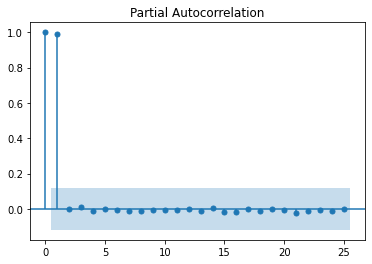

In [14]:
from statsmodels.tsa.ar_model import AutoReg

#
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
#
from statsmodels.tsa.stattools import adfuller
#
# Run the test
#
df_stationarityTest = adfuller(series, autolag='AIC')
#
# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1])
#
# Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
#
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(series, lags=25)

In [15]:
#
# Create training and test data
#
train_data = series
#
# Instantiate and fit the AR model with training data
#
ar_model = AutoReg(train_data, lags=1).fit()
#
# Print Summary
#
print(ar_model.summary())

                               AutoReg Model Results                               
Dep. Variable:     people_fully_vaccinated   No. Observations:                  271
Model:                          AutoReg(1)   Log Likelihood               -3630.178
Method:                    Conditional MLE   S.D. of innovations         167069.519
Date:                     Wed, 13 Oct 2021   AIC                             24.075
Time:                             22:49:28   BIC                             24.115
Sample:                         01-13-2021   HQIC                            24.091
                              - 10-09-2021                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercept                    3.11e+04   1.42e+04      2.191      0.028    3280.228    5.89e+04
people_fully_vaccinated.L1     1.0121      

C:\Users\Nathanael Theo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Nathanael Theo\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


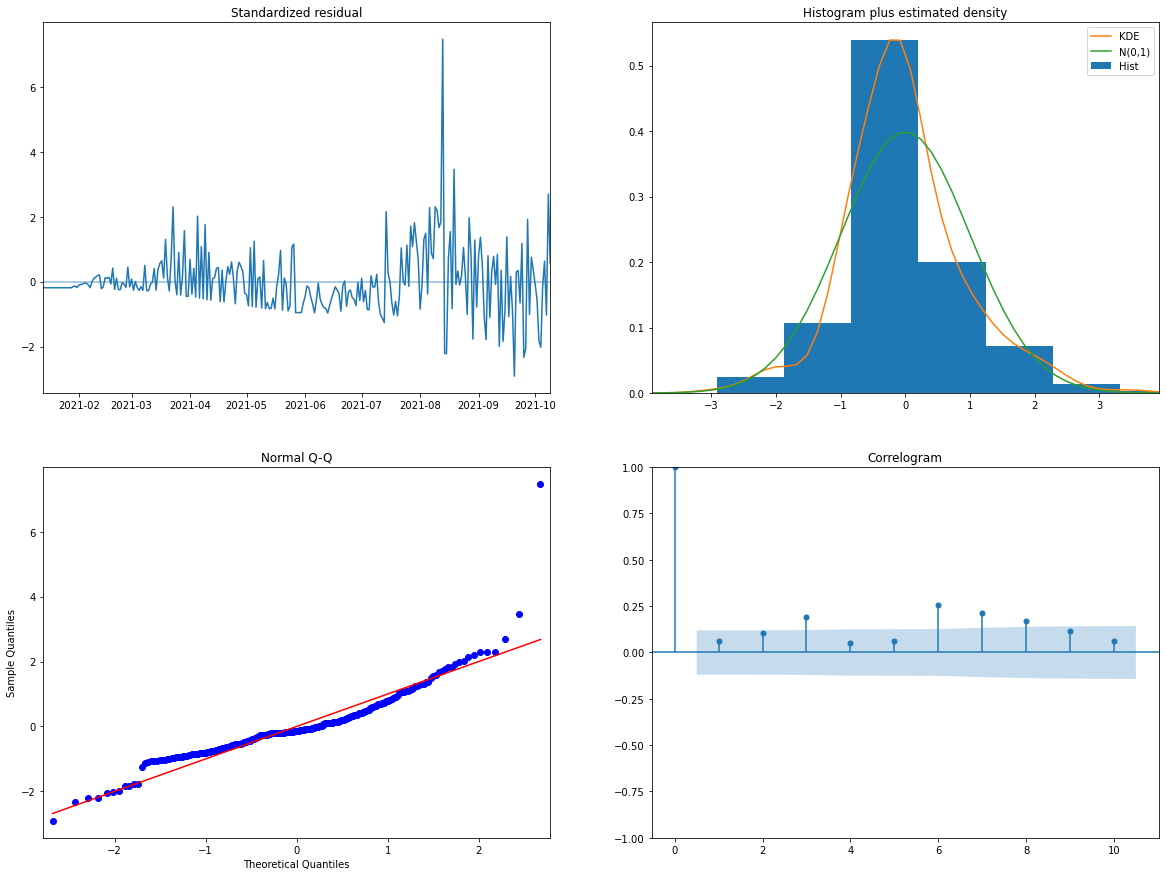

In [16]:
ar_model.plot_diagnostics(figsize=(20,15))
plt.show()

C:\Users\Nathanael Theo\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


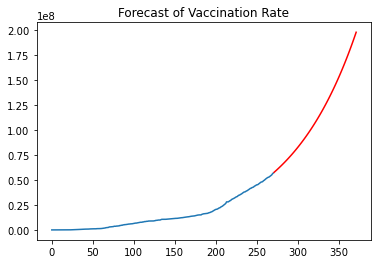

In [19]:
import numpy as np

# Forecast
n_periods = 100
fc = ar_model.predict(start=pd.to_datetime('2021-10-10'), end = pd.to_datetime('2021-10-10') + pd.DateOffset(days=n_periods))
fc = pd.DataFrame(fc)
index_of_fc = np.arange(len(series), len(series)+n_periods+1)

# make series for plotting purpose
fc_series = fc.set_index(index_of_fc)
series_numindex = series.set_index(np.arange(0, len(series)))
series_numindex = series_numindex['people_fully_vaccinated']

# Plot
plt.plot(series_numindex)
plt.plot(fc_series, color='red')
#plt.fill_between(lower_series.index,
#lower_series,
#upper_series,
#color='k', alpha=.15)
plt.title("Forecast of Vaccination Rate")
plt.show()

In [21]:
fc.tail(20)

,0
2021-12-30,1.567961e+08
2021-12-31,1.587231e+08
2022-01-01,1.606734e+08
2022-01-02,1.626473e+08
2022-01-03,1.646450e+08
2022-01-04,1.666670e+08
2022-01-05,1.687133e+08
2022-01-06,1.707845e+08
2022-01-07,1.728806e+08
2022-01-08,1.750021e+08


# Moving Average

In [152]:
from statsmodels.tsa.arima.model import ARIMA
from random import random

for j in range(1,20):
    model = ARIMA(series.values[1:], order=(0, 0, j))
    result = model.fit()
    print('Lag Order =', j)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  9513.697619435357
BIC :  9524.492885312353
HQIC:  9518.032528025322 

Lag Order = 2
AIC :  9468.929207941448
BIC :  9483.32289577744
HQIC:  9474.7090860614 

Lag Order = 3
AIC :  9458.950977830329
BIC :  9476.943087625321
HQIC:  9466.175825480268 

Lag Order = 4
AIC :  9456.185960989034
BIC :  9477.776492743025
HQIC:  9464.855778168961 

Lag Order = 5
AIC :  9456.419747471828
BIC :  9481.608701184816
HQIC:  9466.534534181743 

Lag Order = 6
AIC :  9457.583627161115
BIC :  9486.371002833102
HQIC:  9469.143383401019 

Lag Order = 7
AIC :  9459.137716065627
BIC :  9491.523513696611
HQIC:  9472.142441835518 

Lag Order = 8
AIC :  9460.648083273238
BIC :  9496.632302863221
HQIC:  9475.097778573117 

Lag Order = 9
AIC :  9463.046936013863
BIC :  9502.629577562846
HQIC:  9478.941600843731 

Lag Order = 10
AIC :  9466.012300553635
BIC :  9509.193364061615
HQIC:  9483.351934913491 

Lag Order = 11
AIC :  9468.182205530295
BIC :  9514.961690997274
HQIC:  9486.966809420139 



In [166]:
model = ARIMA(series.values[1:], order = (0,0,4))
result = model.fit()

In [167]:
forecast = result.forecast(y=series.values[1:], steps=4)
df_forecast = pd.DataFrame(forecast)

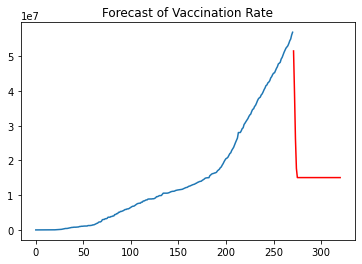

In [157]:
import numpy as np

# Forecast
n_periods = 50
index_of_fc = np.arange(len(series), len(series)+n_periods)

# make series for plotting purpose
fc_series = df_forecast.set_index(index_of_fc)
series_numindex = series.set_index(np.arange(0, len(series)))
series_numindex = series_numindex['people_fully_vaccinated']

# Plot
plt.plot(series_numindex)
plt.plot(fc_series, color='red')
#plt.fill_between(lower_series.index,
#lower_series,
#upper_series,
#color='k', alpha=.15)
plt.title("Forecast of Vaccination Rate")
plt.show()

In [170]:
series.to_excel('data_vaksin.xlsx')

In [171]:
fc.tail(5)

,0
2021-11-25,1.020704e+08
2021-11-26,1.033356e+08
2021-11-27,1.046162e+08
2021-11-28,1.059123e+08
2021-11-29,1.072241e+08
